In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
from matplotlib import cm

In [41]:
titanic1 = titanic[['Pclass', 'Sex', 'Fare', 'Survived']]

In [42]:
titanic1['Sex'] = titanic1.Sex.replace({'male':0, 'female':1})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
titanic1['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [54]:
titanic1

,Pclass,Sex,Fare,Survived
0,3,0,7.2500,0
1,1,1,71.2833,1
2,3,1,7.9250,1
3,1,1,53.1000,1
4,3,0,8.0500,0
...,...,...,...,...
886,2,0,13.0000,0
887,1,1,30.0000,1
888,3,1,23.4500,0
889,1,0,30.0000,1


In [44]:
titanic1 = titanic1.dropna()

In [45]:
X = titanic1[['Pclass', 'Sex', 'Fare']]
y = titanic1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<IPython.core.display.Javascript object>


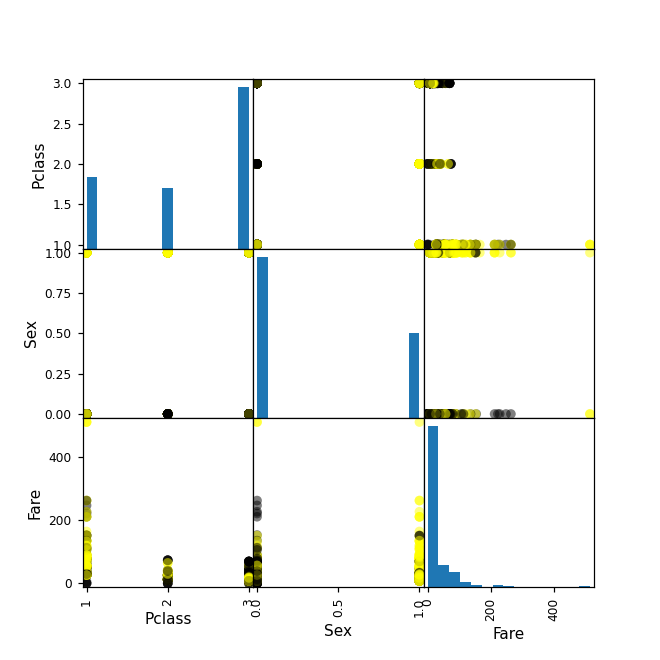

In [46]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(6,6), cmap=cmap)

<IPython.core.display.Javascript object>


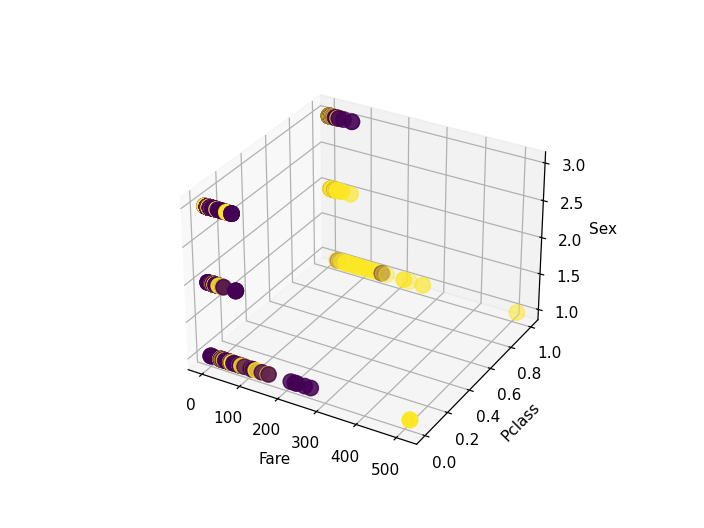

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Fare'], X_train['Sex'], X_train['Pclass'], c = y_train, marker='o', s=100)
ax.set_xlabel('Fare')
ax.set_ylabel('Pclass')
ax.set_zlabel('Sex')
plt.show()           

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
X_train

,Pclass,Sex,Fare
105,3,0,7.8958
68,3,1,7.9250
253,3,0,16.1000
320,3,0,7.2500
706,2,1,13.5000
...,...,...,...
835,1,1,83.1583
192,3,1,7.8542
629,3,0,7.7333
559,3,1,17.4000


In [55]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7847533632286996

In [56]:
knn.score(X_train, y_train)

0.8308383233532934

In [57]:
y_pred = knn.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [60]:
knn.predict([[3, 1, 25]])

array([0], dtype=int64)

In [53]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7937219730941704

In [82]:
training_accuracy  = []
test_accuracy = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))    

<IPython.core.display.Javascript object>


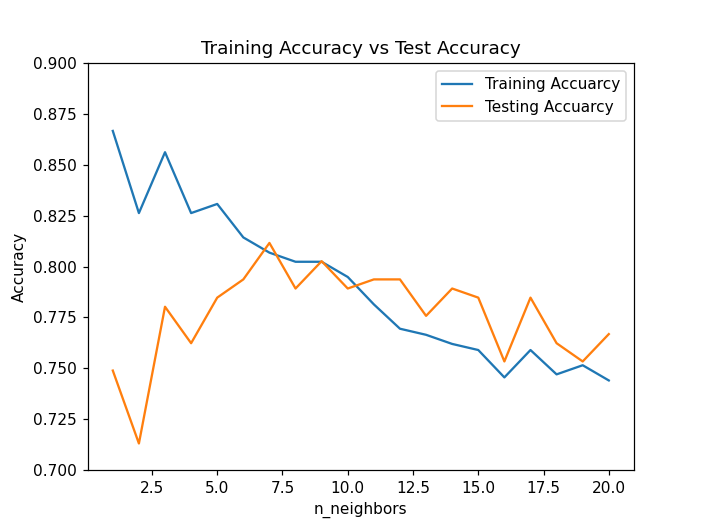

In [83]:
plt.figure()
plt.plot(range(1, 21), training_accuracy, label='Training Accuarcy')
plt.plot(range(1, 21), test_accuracy, label='Testing Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.9])
plt.legend(loc='best')
plt.show()